List files in current working directory:

In [1]:
import os

In [3]:
!ls

a.bamlist		 ery_30-3.sorted.bam	   par_34-15.bam
ALL.bamlist		 ery_30-4.bam		   par_34-15.sorted.bam
Big_Data.ipynb		 ery_30-4.sorted.bam	   par_34-16.bam
ery_30-10.bam		 ery_30-5.bam		   par_34-16.sorted.bam
ery_30-10.sorted.bam	 ery_30-5.sorted.bam	   par_34-17.bam
ery_30-11.bam		 ery_30-6.bam		   par_34-17.sorted.bam
ery_30-11.sorted.bam	 ery_30-6.sorted.bam	   par_34-18.bam
ery_30-12.bam		 ery_30-7.bam		   par_34-18.sorted.bam
ery_30-12.sorted.bam	 ery_30-7.sorted.bam	   par_34-1.bam
ery_30-13.bam		 ery_30-8.bam		   par_34-1.sorted.bam
ery_30-13.sorted.bam	 ery_30-8.sorted.bam	   par_34-2.bam
ery_30-14.bam		 ery_30-9.bam		   par_34-2.sorted.bam
ery_30-14.sorted.bam	 ery_30-9.sorted.bam	   par_34-3.bam
ery_30-15.bam		 ery_mpileup.log	   par_34-3.sorted.bam
ery_30-15.sorted.bam	 exclude_contigs.SEposgt2  par_34-4.bam
ery_30-15.sorted.cov.gz  nohup.out		   par_34-4.sorted.bam
ery_30-16.bam		 par_34-10.bam		   par_34-5.bam
ery_30-16.sorted.bam	 par_34-10.sorted.bam	   par_34-5.sorted.b

If a `ery_30-15.sorted.cov` does not exist yet, create one using `bamtools coverage`:

In [11]:
if not os.path.exists("ery_30-15.sorted.cov.gz"):
    try:
        # 'call' is from the subprocess module
        retcode = os.system("bamtools coverage -in ery_30-15.sorted.bam | gzip > ery_30-15.sorted.cov.gz")
        if retcode < 0:
            print "Child was terminated by signal", -retcode
        else:
            print "Child returned", retcode
    except OSError as e:
        print "Execution failed", e
else:
    print "file already exists"

file already exists


Let's have a quick look at the new coverage file:

In [12]:
!gzip -dc ery_30-15.sorted.cov.gz | head

Contig_29981	1	349
Contig_29981	2	349
Contig_29981	3	349
Contig_29981	4	349
Contig_29981	5	349
Contig_29981	6	349
Contig_29981	7	349
Contig_29981	8	349
Contig_29981	9	349
Contig_29981	10	349

gzip: stdout: Broken pipe


The file has three columns: contig ID TAB position TAB coverage. The position should be 0-based, since I have padded the contigs with an "N" at beginning and end, so that the lowest mapping position should be 2 with 1-based coordinates.

Let's tally the coverage:

In [16]:
with os.popen("gzip -dc ery_30-15.sorted.cov.gz | cut -f 3", "r") as cov:
    for _ in xrange(10):
        print cov.readline().rstrip()

349
349
349
349
349
349
349
349
349
349


In [65]:
CovCountDict = {}
with os.popen("gzip -dc ery_30-15.sorted.cov.gz | cut -f 3", "r") as cov:
    for c in cov:
        c = int(c.rstrip())
        try:
            CovCountDict[c] += 1
        except KeyError:
            CovCountDict[c] = 1

In [71]:
# sort key-value pairs by key (coverage) and show the first 100: 
cov_sorted = sorted(CovCountDict.items(), key=lambda e: e[0])
cov_sorted[:100]

[(0, 7398174),
 (1, 2829384),
 (2, 2102379),
 (3, 1737193),
 (4, 1449721),
 (5, 1215765),
 (6, 1012149),
 (7, 832564),
 (8, 706481),
 (9, 579169),
 (10, 470103),
 (11, 388198),
 (12, 321944),
 (13, 263423),
 (14, 219163),
 (15, 181047),
 (16, 153764),
 (17, 125069),
 (18, 112219),
 (19, 98572),
 (20, 84427),
 (21, 73044),
 (22, 63984),
 (23, 58634),
 (24, 49832),
 (25, 44177),
 (26, 38411),
 (27, 35327),
 (28, 29849),
 (29, 27619),
 (30, 25231),
 (31, 22986),
 (32, 20835),
 (33, 19784),
 (34, 17969),
 (35, 16187),
 (36, 15126),
 (37, 13872),
 (38, 13569),
 (39, 11730),
 (40, 11411),
 (41, 10189),
 (42, 10235),
 (43, 10397),
 (44, 9079),
 (45, 8006),
 (46, 8412),
 (47, 8199),
 (48, 6755),
 (49, 6818),
 (50, 6778),
 (51, 6541),
 (52, 6061),
 (53, 5584),
 (54, 5880),
 (55, 5044),
 (56, 5101),
 (57, 4946),
 (58, 4516),
 (59, 4401),
 (60, 4559),
 (61, 4367),
 (62, 4252),
 (63, 4491),
 (64, 3553),
 (65, 3714),
 (66, 3752),
 (67, 3634),
 (68, 3533),
 (69, 3180),
 (70, 3252),
 (71, 3264),
 (72

In [48]:
import pylab
%matplotlib inline

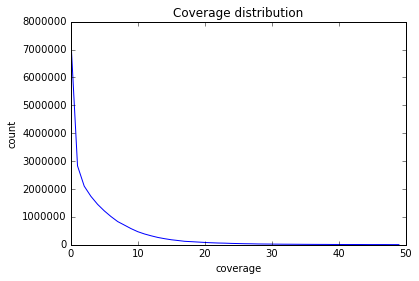

In [72]:
pylab.plot([i[0] for i in cov_sorted][:50], [i[1] for i in cov_sorted][:50])
pylab.title("Coverage distribution")
pylab.xlabel("coverage")
pylab.ylabel("count")

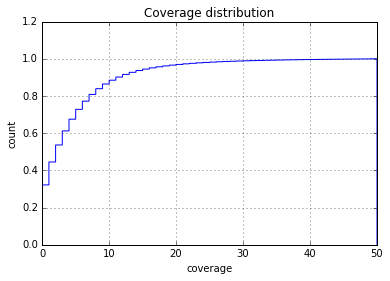

In [78]:
coverage = [i[0] for i in cov_sorted]
counts = [i[1] for i in cov_sorted]
pylab.hist(coverage, weights=counts, bins=50, range=(0,50), normed=True, cumulative=True, histtype="step")
pylab.title("Coverage distribution")
pylab.xlabel("coverage")
pylab.ylabel("count")
pylab.grid()

In [61]:
len(count.keys())

1545